<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_49%2650_Assignmentb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 50: Logistic Regression and RandomForestClassifier on social media dataset

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Deploying A Prediction Model
 2. Model Evaluation
 3. Logistic Regression - Univariate I



---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of  advertising. Advertisers can utilise user's demographic information and target their ads accordingly.

Implement Random Forest Classification and Logistic Regression to determine whether a user will purchase a particular product displayed on a social network ad or not.  Compare the accuracy of both the classification algorithms.


---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Train-Test Split

**Activity 3:** Random Forest Classification - Model Training

**Activity 4:** Random Forest Classification - Model Prediction and Evaluation

**Activity 5:** Logistic Regression - Model Training

**Activity 6:** Logistic Regression - Model Prediction and Evaluation

**Activity 7:** Comparision and Conclusion








---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Social Network** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|


  **Source:** https://www.kaggle.com/rishabhsingh98/social-network-ads
  


- Print the first five rows of the dataset. Check for null values and treat them accordingly (if any).

- Create a heatmap to identify the relationship between the independent attributes and dependent attribute `Purchased`.




In [ ]:
# Import modules
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/content/social-network-ads.csv")
# Print the first five rows of the dataframe
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Q:** Are there any missing values?

**A:**  NO

In [ ]:
# Replace the unique non-numeric categories in 'Gender' column with numeric values using loc method

df.loc[df["Gender"] == "Male","Gender"] = 0
df.loc[df["Gender"] == "Female","Gender"] = 1

In [ ]:
df["Gender"].value_counts()

,count
Gender,
1,204
0,196


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


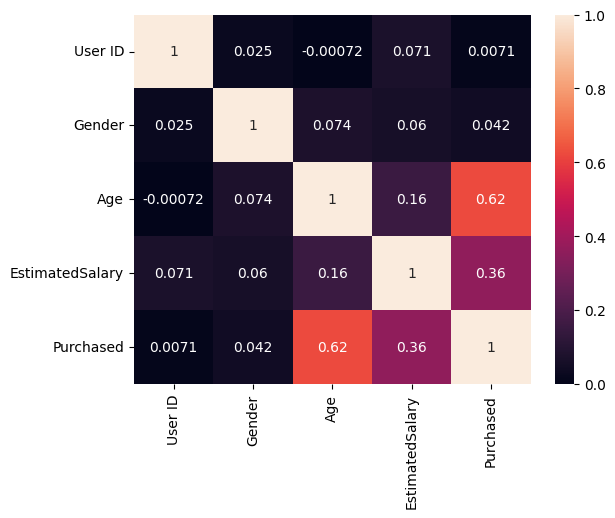

In [ ]:
# Create a heatmap to identify the relation between attributes
sns.heatmap(df.corr(),annot = True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature?

**A:** Age

---


#### Activity 2: Train-Test Split

We have to determine the effect of `Age` on purchase of the products. Thus, `Age` is the feature variable and `Purchased` is the target variable.

- Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

- Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of `numpy` module.


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
# Split the DataFrame into the train and test sets.
from sklearn.model_selection import train_test_split

X = df["Age"]

y= df["Purchased"]




# Split the DataFrame into the train and test sets such that test set has 30% of the values.
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state = 0)



In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:

# Reshape to 2-dimensional array.
X_train = np.array(X_train).reshape(-1,1)
X_test= np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

----

#### Activity 3: Random Forest Classification - Model Training

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using `score()` function using the object created.


In [ ]:
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_jobs = -1, n_estimators= 50)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8321428571428572

-----

#### Activity 4: Random Forest Classification - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Random Forest Classifier object.

Also, compute confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Make predictions on the test dataset by using the 'predict()' function.
rf_y_pred = rf_clf.predict(X_test)
rf_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
r = pd.DataFrame(y_test)
r[0].value_counts()

,count
0,
0,79
1,41


In [ ]:
# Check the count of records classified under each label

p = pd.Series(rf_y_pred)
p.value_counts()

,count
0,79
1,41


In [ ]:
# Display the results of 'confusion_matrix'
confusion_matrix(y_test,rf_y_pred)


array([[71,  8],
       [ 9, 32]])

In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        79
           1       0.80      0.78      0.79        41

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



**Q** Write the count of f1-score of both labels?

**A:**

----

#### Activity 5: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print score using `score()` function using the object created.


In [ ]:
# Deploy the 'LogisticRegression' model using the 'fit()' function.

from sklearn.linear_model  import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1)
log_reg.fit(X_train,y_train)
log_reg.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8285714285714286

----

#### Activity 6: Logistic Regression - Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the Logistic Regression object.

Also, compute the confusion matrix and classification report values to evaluate the accuracy of your model.

In [ ]:
# Make predictions on the test dataset by using the 'predict()' function.
log_y_pred = log_reg.predict(X_test)
log_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
# Display the results of confusion_matrix
confusion_matrix(y_test,log_y_pred)

array([[74,  5],
       [11, 30]])

In [ ]:
# Display the results of classification_report
print(classification_report(y_test,log_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120



**Q** Write the count of f1-score of both labels?

**A:**

-----

#### Activity 7: Comparision and Conclusion

Test both the models to predict labels using same random values of `Age` attribute.

In [ ]:
# Predict labels with same random values from dataset

# Using Random Forest Classifier
print("Random Forest Classification")
print("----------------------------")
print(f"Prediction of Random Forest Classification with age = 18: {rf_clf.predict(np.array(18).reshape(-1, 1))}")
print(f"Prediction of Random Forest Classification with age = 60: {rf_clf.predict(np.array(60).reshape(-1, 1))}\n")

# Using Logistic Regression
print("Logistic Regression Classification")
print("----------------------------------")
print(f"Prediction of Logistic Regression Classification with age = 18: {log_reg.predict(np.array(18).reshape(-1, 1))}")
print(f"Prediction of Logistic Regression Classification with age = 60: {log_reg.predict(np.array(60).reshape(-1, 1))}")

Random Forest Classification
----------------------------
Prediction of Random Forest Classification with age = 18: [0]
Prediction of Random Forest Classification with age = 60: [1]

Logistic Regression Classification
----------------------------------
Prediction of Logistic Regression Classification with age = 18: [0]
Prediction of Logistic Regression Classification with age = 60: [1]


**Q** Which model is better and why?

**A:**

#### Activity 8:  Normalise the Dataset

 Perform the following tasks:

 - Get the descriptive statistics for the `Age` column.

 - Normalise the `Age` column values by calculating their $Z$-scores (or standard scaler).



Age Descriptive Statistics:
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64



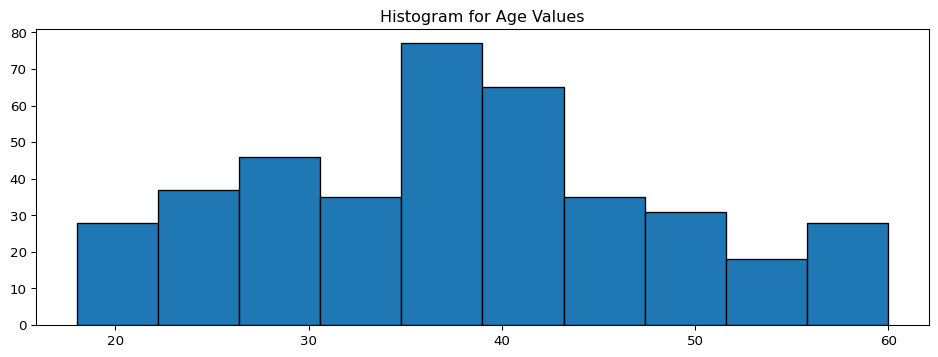

In [ ]:
# Get the descriptive statistics for the 'Age' column.
print(f"Age Descriptive Statistics:\n{df['Age'].describe()}\n")
# Plot a histogram to show the distribution of values for the 'Age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for Age Values")
plt.hist(df['Age'], bins = 'sturges', edgecolor = 'black')
plt.show()

Descriptive statistics for the normalised age values:
count    4.000000e+02
mean    -1.421085e-16
std      1.000000e+00
min     -1.874962e+00
25%     -7.540869e-01
50%     -6.248285e-02
75%      7.960601e-01
max      2.131571e+00
Name: Age, dtype: float64



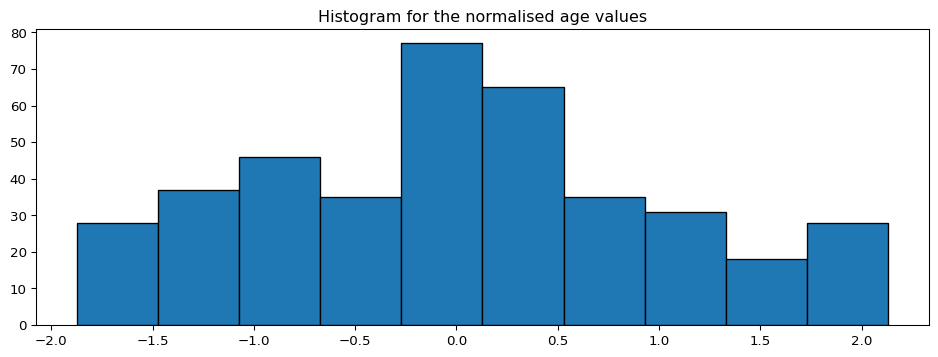

In [ ]:
# Normalise the 'Age' column values using the standard scaler method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

# Get the descriptive statistics for the normalised 'Age' column.
age_scaled = standard_scaler(df['Age'])
print(f"Descriptive statistics for the normalised age values:\n{age_scaled.describe()}\n")

# Plot a histogram to show the distribution of values for the normalised 'age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the normalised age values")
plt.hist(age_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

---

#### Activity 9:  Calculate the Sigmoid Output

1. Create a sigmoid function.

2.  Calculate the sigmoid output for the scaled (or Normalised) `Age` values.

In [ ]:
# Create a sigmoid() function using the above formula.
def sigmoid(x):
  return pd.Series(1 / (1 + np.exp(-x)))

In [ ]:
# Calculate the sigmoid output for the scaled (or normalised) Age values.
age_scaled_sigmoid_output = sigmoid(age_scaled)

# Get the descriptive statistics for the sigmoid output of the normalised 'Age'.
print(f"Descriptive stats for sigmoid output of scaled Age values:\n{age_scaled_sigmoid_output.describe()}")

Descriptive stats for sigmoid output of scaled Age values:
count    400.000000
mean       0.497031
std        0.212792
min        0.132969
25%        0.319999
50%        0.484384
75%        0.689131
max        0.893934
Name: Age, dtype: float64


---

#### Activity 10:  Model Prediction

Consider the threshold probability value of 0.5.

- Create a function that classifies the sigmoid output for the scaled  `Age` values into 0s and 1s using a threshold value of 0.5.


In [ ]:
# Create a function 'predict()' that takes the sigmoid output and the threshold as its input and returns a Pandas series containing the predicted values (0s and 1s) as its output.

def predict(sigmoid_output, threshold):
  y_pred = [1 if output >= threshold else 0 for output in sigmoid_output]
  return pd.Series(y_pred)

In [ ]:
# Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
# Consider a threshold value of 0.5.
threshold = 0.5
y_pred = predict(age_scaled_sigmoid_output, threshold)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


---

#### Activity 11:  Model Evaluation

Evaluate the model by calculating the number of false positives and false negatives using a confusion matrix. Also, print the classification report for the predicted values.

In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Purchased'], y_pred))

[[181  76]
 [ 29 114]]


In [ ]:
# Print the classification report for the predicted values.
from sklearn.metrics import classification_report

print(classification_report(df['Purchased'], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       257
           1       0.60      0.80      0.68       143

    accuracy                           0.74       400
   macro avg       0.73      0.75      0.73       400
weighted avg       0.77      0.74      0.74       400



**Q** Write the count of f1-score for both the labels?

**A:** 1. Label `0`  : 0.78
2. Label `1`  : 0.68

---

#### Activity 12: Experiment and Compare Performance With Some Threshold Values

Try threshold values =$[0.1,0.3,0.5,0.7,0.9]$ and compare their performance. Plot a graph to visualise.

[0.3575, 0.5675, 0.7375, 0.82, 0.6425]


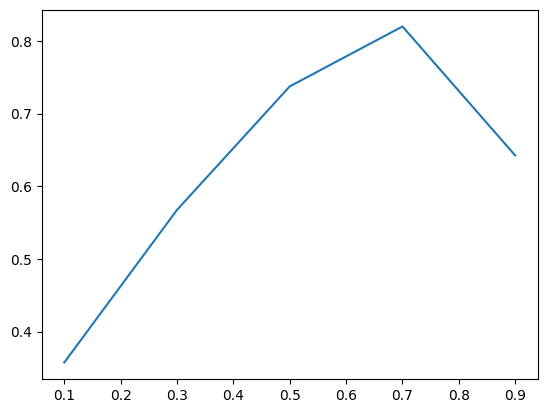

In [ ]:
# Function to calculate accuracy
def acc(y,y_pred):
  count=0
  for i in range(len(y)):
    if y[i]==y_pred[i]:
      count=count+1
  return count/len(y)


# Calculate accuracy and save it in the accuracy list
threshold=[0.1,0.3,0.5,0.7,0.9]
accuracy=[]


for i in [0.1,0.3,0.5,0.7,0.9]:
  y_pred=predict(age_scaled_sigmoid_output, i)
  accuracy.append(acc(df['Purchased'], y_pred))

# Print the accuracy values
print(accuracy)

# Plot a graph to visualise the accuracy for various thresholds
plt.plot(threshold,accuracy)

# Function to show the plot
plt.show()

**Q:** What are your observations for change in accuracy with respect to threshold values? Why do you think this is the case?

**A:** There is increase in the accuracy and then sudden dip is observed.

**Reason**: As we move along the extremes in the sigmoid function, it becomes more biased towards certain labels.

------